In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pickle



In [2]:

df = pd.read_csv(r"C:\Users\iamda\OneDrive\Desktop\jupyter\project\only datasets here\Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:

# droping some column
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:

df['CreditScore']


0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [6]:

df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

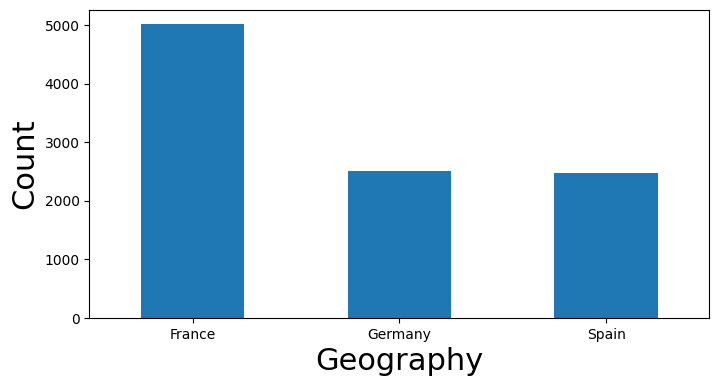

In [7]:

plt.figure(figsize=(8,4))
df['Geography'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.xlabel('Geography',size=22)
plt.ylabel('Count',size=22)
plt.show()


In [8]:

# doing one hot encoding
ohe = OneHotEncoder()
ohe_geo = ohe.fit_transform(df[['Geography']]).toarray()

gender = OneHotEncoder()
gender_ohe = gender.fit_transform(df[['Gender']]).toarray()


print(ohe_geo,gender_ohe)


[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [9]:

# picking the file

with open('ohe.pkl','wb') as File:
    pickle.dump(ohe,File)

with open('gender.pkl','wb') as File:
    pickle.dump(gender,File)


In [10]:

df.drop(['Geography','Gender'],axis=1,inplace=True)


In [11]:

df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [12]:

df['Exited'].unique()


array([1, 0])

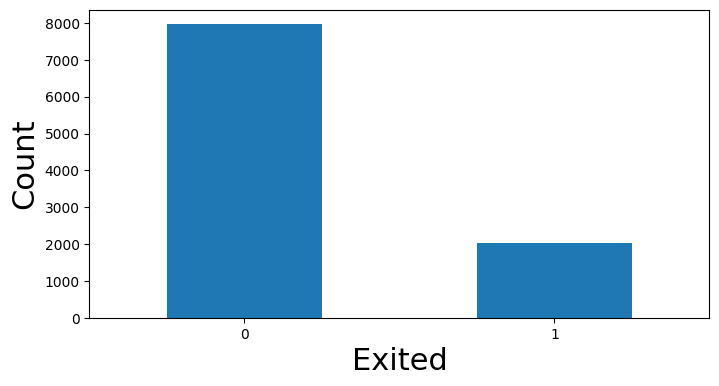

In [13]:

plt.figure(figsize=(8,4))
df['Exited'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.xlabel('Exited',size=22)
plt.ylabel('Count',size=22)
plt.show()

In [14]:

X = df.drop(['Exited'],axis=1)

Y = df['Exited']

X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [15]:

X1 = np.hstack((X,ohe_geo,gender_ohe))
X1


array([[619.,  42.,   2., ...,   0.,   1.,   0.],
       [608.,  41.,   1., ...,   1.,   1.,   0.],
       [502.,  42.,   8., ...,   0.,   1.,   0.],
       ...,
       [709.,  36.,   7., ...,   0.,   1.,   0.],
       [772.,  42.,   3., ...,   0.,   0.,   1.],
       [792.,  28.,   4., ...,   0.,   1.,   0.]])

In [16]:

x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.2,random_state=42)
x_train

array([[686.,  32.,   6., ...,   0.,   0.,   1.],
       [632.,  42.,   4., ...,   0.,   0.,   1.],
       [559.,  24.,   3., ...,   1.,   0.,   1.],
       ...,
       [735.,  38.,   1., ...,   0.,   1.,   0.],
       [667.,  43.,   8., ...,   0.,   0.,   1.],
       [697.,  51.,   1., ...,   0.,   0.,   1.]])

In [17]:

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train_scaler

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

In [18]:

# picking the standardscaler file

with open('scaler.pkl','wb') as File:
    pickle.dump(scaler,File)


In [19]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [20]:

model = Sequential()

model.add(Dense(64,activation='relu',input_dim = x_train_scaler.shape[1],kernel_initializer='glorot_normal'))
model.add(Dense(120,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(240,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(360,activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(x_train_scaler,y_train,epochs=15,validation_data=(x_test_scaler,y_test))

history

c:\Users\iamda\OneDrive\Desktop\try1\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8098 - loss: 0.4658 - val_accuracy: 0.8550 - val_loss: 0.3570
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8551 - loss: 0.3536 - val_accuracy: 0.8560 - val_loss: 0.3624
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8615 - loss: 0.3369 - val_accuracy: 0.8535 - val_loss: 0.3491
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8716 - loss: 0.3199 - val_accuracy: 0.8625 - val_loss: 0.3417
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8654 - loss: 0.3275 - val_accuracy: 0.8625 - val_loss: 0.3487
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8655 - loss: 0.3146 - val_accuracy: 0.8545 - val_loss: 0.3579
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8757 - loss: 0.3055 - val_accuracy: 0.8525 - val_loss: 0.3473
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8730 - loss: 0.3035 - val_accuracy: 0.

In [21]:
model.save('model.h5')

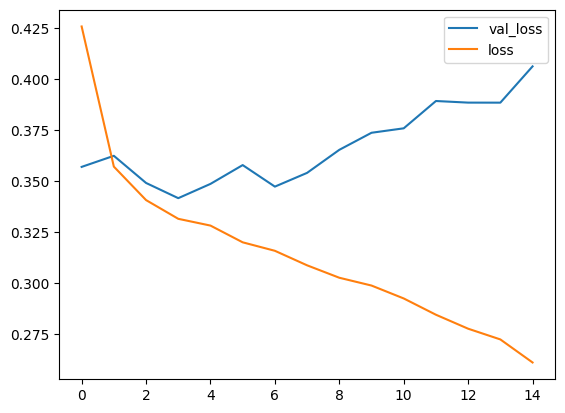

In [22]:

plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()


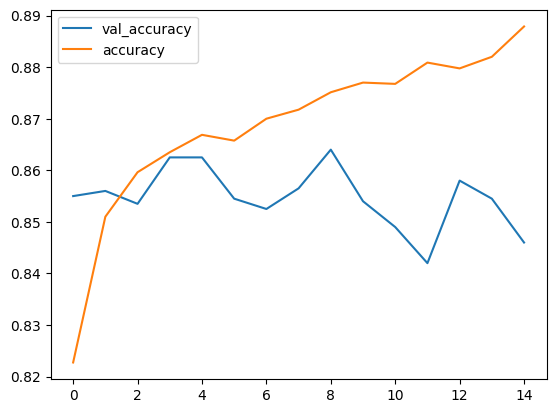

In [23]:

plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.show()
